# HW 3 Programming Part

## Problem 1

Read in the dataset stored in 'HW3P1.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

(a) Plot the training data, each class with a different color and marker.

(b) Build two linear SVM classifiers, one with $C=1$ and one with $C=100$. Plot the decision boundary for each case along with the training data.

(c) Interpretate what leads to the different behavior of the two models (and thus the decision boundaries).

In [271]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [186]:
# Reading in the data:
HW3P1= pd.read_csv('HW3P1 (1).txt', sep = " ", header=None)

In [187]:
# Read in the Data
hw3p1_data = pd.read_csv('HW3P1 (1).txt', header = None, sep = " ")
# See what the data looks like
hw3p1_data.head()

,0,1,2
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


In [188]:
#Feature Matrix
X = hw3p1_data.iloc[:,0:2]
X.head()

,0,1
0,1.9643,4.5957
1,2.2753,3.8589
2,2.9781,4.5651
3,2.9320,3.5519
4,3.5772,2.8560


In [189]:
#Create target Vector
y = hw3p1_data.iloc[:, -1]
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 2, dtype: float64

In [190]:
# Create the labels for label 

label_0=hw3p1_data[hw3p1_data.iloc[:,2]==0]
label_0.head()

,0,1,2
20,1.5841,3.3575,0.0
21,2.0103,3.2039,0.0
22,1.9527,2.7843,0.0
23,2.2753,2.7127,0.0
24,2.3099,2.9584,0.0


In [191]:
# Create Labels for label 1

label_1=hw3p1_data[hw3p1_data.iloc[:,2]==1]
label_1.head()

,0,1,2
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


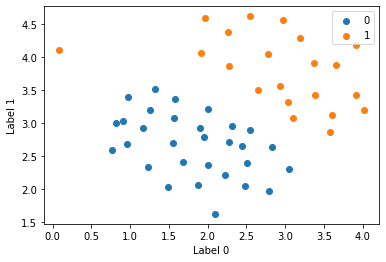

In [192]:
# Visualize the data
plt.scatter(label_0.iloc[:, 0], label_0.iloc[:, 1], label='0')
plt.scatter(label_1.iloc[:, 0], label_1.iloc[:, 1], label='1')
plt.legend()
plt.xlabel('Label 0')
plt.ylabel('Label 1');

(b) Build two linear SVM classifiers, one with $C=1$ and one with $C=100$. Plot the decision boundary for each case along with the training data.

In [212]:
# First we will build a linear SVM Classifier with C=1


# Build linear svm classifier
# Scaling is important for SVM. 
# Build a Pipeline that first scales data and then trains the model
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=36)),
])

# Train the model
svm_clf.fit(X, y)
# Make a prediction
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [213]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

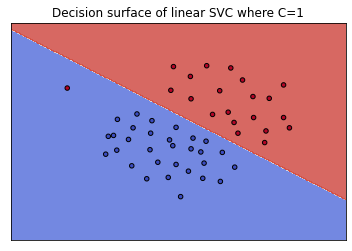

No handles with labels found to put in legend.


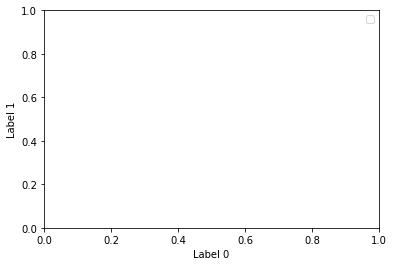

In [195]:
def make_meshgrid(X, y, h=.02):
    X_min, X_max = X.min()-1, X.max() + 1
    y_min, y_max = y.min()-1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# The classification SVC model
model = svm.SVC(kernel="linear")
clf = model.fit(X, y)

fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of linear SVC where C=1')
# Set-up grid for plotting.

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")


ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
#plt.scatter(label_0.iloc[:, 0], label_0.iloc[:, 1], label='0')
#plt.scatter(label_1.iloc[:, 0], label_1.iloc[:, 1], label='1')
plt.legend()
plt.xlabel('Label 0')
plt.ylabel('Label 1');

In [196]:
# Plot the decision boundary
X_scaled = svm_clf["scaler"].transform(X)
x_db = [X_scaled[:,0].min(), X_scaled[:,0].max()]
beta0 = svm_clf["linear_svc"].intercept_[0]
beta1 = svm_clf["linear_svc"].coef_[0][0]
beta2 = svm_clf["linear_svc"].coef_[0][1]
y_db = - (beta0 + np.dot(beta1, x_db)) / beta2

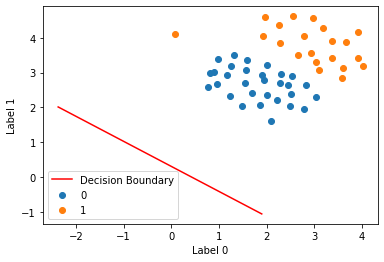

In [197]:
plt.plot(x_db, y_db, label='Decision Boundary', c='r')


# Plot the decision Boundary 
plt.scatter(label_0.iloc[:, 0], label_0.iloc[:, 1], label='0')
plt.scatter(label_1.iloc[:, 0], label_1.iloc[:, 1], label='1')
plt.legend()
plt.xlabel('Label 0')
plt.ylabel('Label 1');

In [198]:
# Now, we will build a linear SVM Classifier with C=100


# Build linear svm classifier
# Scaling is important for SVM. 
# Build a Pipeline that first scales data and then trains the model
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=36)),
])

# Train the model
svm_clf.fit(X, y)
# Make a prediction
svm_clf.predict([[5.5, 1.7]])

C:\Users\12563\OneDrive\New folder\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.])

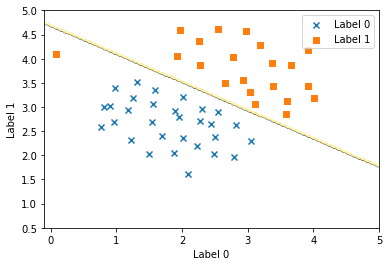

In [214]:
def plot_decision_boundary(model, label_1, label_0):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -0.1, 5
    y_min, y_max = 0.5, 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(label_0.iloc[:, 0], label_0.iloc[:, 1], marker='x')
    plt.scatter(label_1.iloc[:, 0], label_1.iloc[:, 1], marker='s')
    plt.legend(['Label 0', 'Label 1'])
    plt.xlabel('Label 0')
    plt.ylabel('Label 1');
plot_decision_boundary(svm_clf,label_1[[0,1]],label_0[[0,1]])    

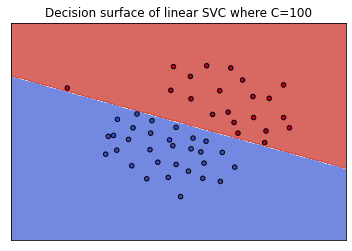

No handles with labels found to put in legend.


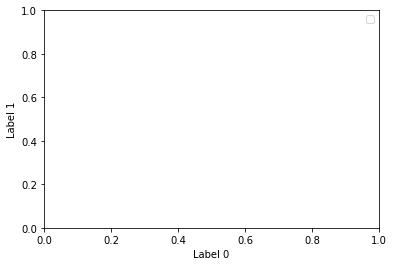

In [104]:
def make_meshgrid(X, y, h=.02):
    X_min, X_max = X.min()-1, X.max() + 1
    y_min, y_max = y.min()-1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# The classification SVC model
model = svm.SVC(kernel="linear",C=100)
clf = model.fit(X, y)

fig, ax = plt.subplots()

# title for the plots
title = ('Decision surface of linear SVC where C=100')
# Set-up grid for plotting.

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")


ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
#plt.scatter(label_0.iloc[:, 0], label_0.iloc[:, 1], label='0')
#plt.scatter(label_1.iloc[:, 0], label_1.iloc[:, 1], label='1')
plt.legend()
plt.xlabel('Label 0')
plt.ylabel('Label 1');

In [210]:
# Now we will build a linear SVM Classifier with C=100


# Build linear svm classifier
# Scaling is important for SVM. 
# Build a Pipeline that first scales data and then trains the model
svm_clf_100 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=36)),
])

# Train the model
svm_clf_100.fit(X, y)
# Make a prediction
svm_clf_100.predict([[5.5, 1.7]])

C:\Users\12563\OneDrive\New folder\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.])

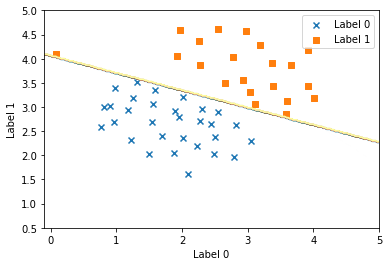

In [211]:
def plot_decision_boundary(model, label_1, label_0):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -0.1, 5
    y_min, y_max = 0.5, 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = svm_clf_100.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(label_0.iloc[:, 0], label_0.iloc[:, 1], marker='x')
    plt.scatter(label_1.iloc[:, 0], label_1.iloc[:, 1], marker='s')
    plt.legend(['Label 0', 'Label 1'])
    plt.xlabel('Label 0')
    plt.ylabel('Label 1');
plot_decision_boundary(svm_clf_100,label_1[[0,1]],label_0[[0,1]])  

(c) Interpretate what leads to the different behavior of the two models (and thus the decision boundaries).

The $C$ paramter in SVM is the penalty paramter of the error term. For greater values of $C$, there is no way that the SVM optimizer can misclassify any single point. The difference in the $C$ value is what is leading to different behavior of the two models (and thus the decision boundaries). When $C=100$ it is a better fit for the model not misclassifing anything. 

## Problem 2

Read in the dataset stored in 'HW3P2.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

(a) Plot the training data, each class with a different color and marker. Is the dataset linearly separable?

(b) Train a SVM using the RBF kernel. Adjust the parameter C to learn a decision boundary that performs well. Plot the decsion boundary.

In [134]:
# Read in the Data
hw3p2_data = pd.read_csv('HW3P2.txt', header = None, sep = " ")
# See what the data looks like
hw3p2_data.head()
hw3p2_data.tail()

,0,1,2
858,0.994240,0.516667,1.0
859,0.964286,0.472807,1.0
860,0.975806,0.439474,1.0
861,0.989631,0.425439,1.0
862,0.996544,0.414912,1.0


In [130]:
#Feature Matrix
X_1 = hw3p2_data.iloc[:,0:2]
X_1.head()
X_1.tail()

,0,1
858,0.994240,0.516667
859,0.964286,0.472807
860,0.975806,0.439474
861,0.989631,0.425439
862,0.996544,0.414912


In [135]:
#Create target Vector
y_1 = hw3p_data.iloc[:, 2]
y_1.head()
y_1.tail()

858    1.0
859    1.0
860    1.0
861    1.0
862    1.0
Name: 2, dtype: float64

In [165]:
# Create the labels for label 

label_0_1=hw3p2_data[hw3p2_data.iloc[:,2]==0]
label_0_1.head()

,0,1,2
193,0.372120,0.851608,0.0
194,0.351382,0.863304,0.0
195,0.305300,0.854532,0.0
196,0.323733,0.841374,0.0
197,0.289171,0.834064,0.0


In [166]:
# Create Labels for label 1

label_1_1=hw3p2_data[hw3p2_data.iloc[:,2]==1]
label_1_1.head()

,0,1,2
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0


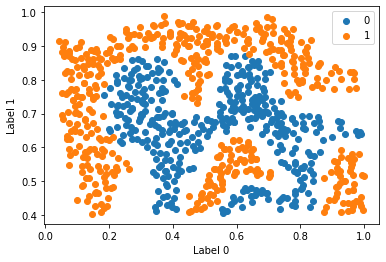

In [167]:
# Visualize the data
plt.scatter(label_0_1.iloc[:, 0], label_0_1.iloc[:, 1], label='0')
plt.scatter(label_1_1.iloc[:, 0], label_1_1.iloc[:, 1], label='1')
plt.legend()
plt.xlabel('Label 0')
plt.ylabel('Label 1');

The dataset is not linearly separable. 

(b) Train a SVM using the RBF kernel. Adjust the parameter C to learn a decision boundary that performs well. Plot the decsion boundary.

In [168]:
# coef0 is r in the polynomial kernel. We use the default gamma value
kernel_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf",  C=1000))])
kernel_clf.fit(X_1, y_1)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1000))])

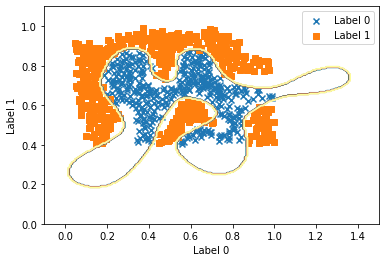

In [181]:
def plot_decision_boundary(model, label_1_1, label_0_1):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -0.1, 1.5
    y_min, y_max = 0, 1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = kernel_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(label_0_1.iloc[:, 0], label_0_1.iloc[:, 1], marker='x')
    plt.scatter(label_1_1.iloc[:, 0], label_1_1.iloc[:, 1], marker='s')
    plt.legend(['Label 0', 'Label 1'])
    plt.xlabel('Label 0')
    plt.ylabel('Label 1');
plot_decision_boundary(kernel_clf,label_1_1[[0,1]],label_0_1[[0,1]])    

## Problem 3

We will investigate the wine quality problem. The data are stored in 'winequality-red.csv'. The description of the data can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality. The last column of the data is the wine quality (0-10), and the other columns are features. Suppose we are intetered in classifying if the wine is good (quality greater than 5) or bad (quality less than or equal to 5). 

(a) Prepare the data. Get the feature matrix, target vector (good wines are labled 1, and 0 for bad wines). Also note that the data are separated by ";". Split the data into training and testing parts using train_test_split (). Set the parameters so that $20\%$ of the data are used as test data. Also set the random_state to 30, so that everyone gets the same splitting.

(b) Build a logistic regression model for your training data. Use all default parameters, except setting solver to 'liblinear'. Also scale the data before building the model. Report the precision, recall and F1 for the testing data.

(c) Repeat Part (b) with a support vector classifier (remember to scale data before training too). Use all default parameters.

(d) Draw the ROC curves for both models from (b) and (c) on the same plot. Find the AUCs for both models too. Does one seem better than the other?

(a) Prepare the data. Get the feature matrix, target vector (good wines are labled 1, and 0 for bad wines). Also note that the data are separated by ";". Split the data into training and testing parts using train_test_split (). Set the parameters so that $20\%$ of the data are used as test data. Also set the random_state to 30, so that everyone gets the same splitting.

In [234]:
# Reading in the data:
wine_data=pd.read_csv('winequality-red.csv', sep=";", header=0)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [235]:
#Feature Matrix
X_wine = wine_data.iloc[:,0:11]
X_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [236]:
#Target Matrix
y_wine = wine_data.iloc[:,-1]
y_wine.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [239]:
#creating labels for the wine 1 if quality is 6-10 & 0 else
y_label = (wine_data["quality"] > 5).astype(np.int)

C:\Users\12563\AppData\Local\Temp/ipykernel_24056/3145113872.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_label = (wine_data["quality"] > 5).astype(np.int)


In [240]:
y_label.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int32

In [244]:
# Now we will split the data into training and testing parts

# Divide the data. 20% of the data are randomly chosen as test data
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_label, test_size=0.2, random_state=30)

In [250]:
# Build a logistic Regression model for your training data. 
# Use all default parameters, except setting solver to 'liblinear'
# Also scale the data before building the model.
# Report the precision, recall, and F1 for the testing data

log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(solver = 'liblinear')),
])

# Training the model
log_reg.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [262]:
# Predict for the X_test data
y_test_pred = log_reg.predict(X_test)
print(y_test_pred)

[1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0]


In [263]:
print( 'The precision score is the following:', precision_score(y_test, y_test_pred))
print()

print( 'The Recall score is the following:', recall_score(y_test, y_test_pred))
print()
print( 'The F1 score is the following:', f1_score(y_test, y_test_pred))

The precision score is the following: 0.7653631284916201

The Recall score is the following: 0.8058823529411765

The F1 score is the following: 0.7851002865329514


In [264]:
# Repeat part (b) with a support vector classifier (remember to scale data before training too).
# Use all default parameters

# Build a logistic Regression model for your training data. 
# Use all default parameters, except setting solver to 'liblinear'
# Also scale the data before building the model.
# Report the precision, recall, and F1 for the testing data

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC()),
])

# Training the model
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC())])

In [268]:
# Predict for the X_test data
y_test_pred_svm_clf = svm_clf.predict(X_test)
print(y_test_pred_svm_clf)

[1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0]


In [269]:
print( 'The precision score is the following:', precision_score(y_test, y_test_pred_svm_clf))
print()

print( 'The Recall score is the following:', recall_score(y_test, y_test_pred_svm_clf))
print()
print( 'The F1 score is the following:', f1_score(y_test, y_test_pred_svm_clf))

The precision score is the following: 0.7777777777777778

The Recall score is the following: 0.8647058823529412

The F1 score is the following: 0.818941504178273


The area under the curve (AUC) is the following: 0.8351764705882353
The area under the curve (AUC) is the following: 0.8536862745098039


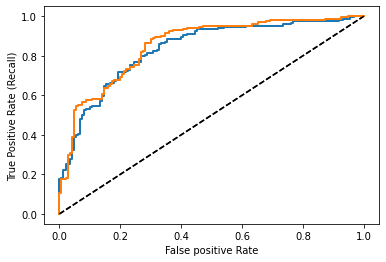

In [288]:
# (d) Draw the ROC curves for both models from (b) and (c) on the same plot.
# Find the AUCs for both models too. Does one seem better than the other?

# Now we plot the ROC curve for the model from (b), the logistic regression.


y_test_scores_log_reg = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores_log_reg)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate (Recall)');

# Finally we find the area under the curve (AUC):
print('The area under the curve (AUC) is the following:', roc_auc_score(y_test, y_test_scores_log_reg))


# Now we plot the ROC curve for the model from (c).


y_test_scores_c = svm_clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores_c)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate (Recall)');

# Finally we find the area under the curve (AUC):
print('The area under the curve (AUC) is the following:', roc_auc_score(y_test, y_test_scores))

The area under the curve (AUC) is the following: 0.8536862745098039


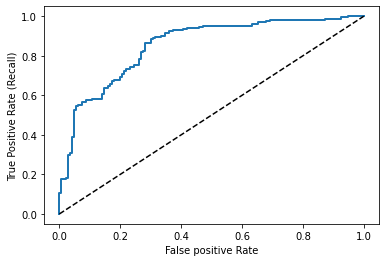

In [287]:
# Now we plot the ROC curve for the model from (c).


y_test_scores_c = svm_clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores_c)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate (Recall)');

# Finally we find the area under the curve (AUC):
print('The area under the curve (AUC) is the following:', roc_auc_score(y_test, y_test_scores))

The Roc Curve for the support vector classifier model (from part c) seems to be a bit better. Also the AUC score for the support vector classifier model (from part c) was a bit higher as well. 